In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Part 1 : Data Preprocessing

In [3]:
df=pd.read_csv('exchange_rate.csv')
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [4]:
df.shape

(7588, 2)

In [5]:
#The dataset consists of 7,588 rows and 2 columns

In [6]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [7]:
# Dataset Contains date information in string format.

In [8]:
# Next Steps:
# Convert the date column to datetime format.
# Explore the time series data by plotting the exchange rate over time.

In [9]:
df['date']=pd.to_datetime(df['date'],format='%d-%m-%Y %H:%M')
df.head()

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-01-02,0.7818
2,1990-01-03,0.7867
3,1990-01-04,0.7860
4,1990-01-05,0.7849


In [16]:
# Set 'date' as the index for time series operations
df.set_index('date', inplace=True)

In [22]:
df.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


## Initial Exploration

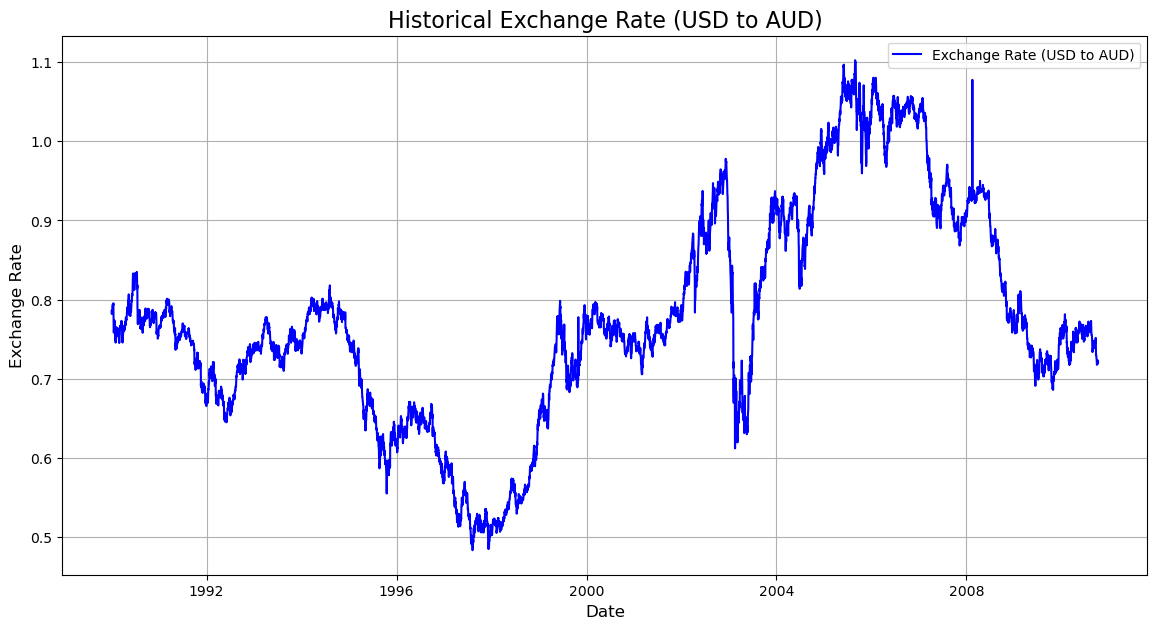

In [25]:
# Initial Exploration: Plot the time series
plt.figure(figsize=(14, 7))
plt.plot(df['Ex_rate'], label='Exchange Rate (USD to AUD)', color='blue')
plt.title('Historical Exchange Rate (USD to AUD)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Exchange Rate', fontsize=12)
plt.legend()
plt.grid()
plt.show()

<!-- ## The plot provides a visualization of the historical exchange rate (USD to AUD) over time:

Trends: There appears to be significant variability over the years, with some long-term upward and downward movements.
Seasonality: Further analysis may be required to confirm seasonal patterns.
Anomalies: Sudden spikes or dips in the exchange rate are visible, which may need attention during preprocessing. -->

#### The plot provides a visualization of the historical exchange rate (USD to AUD) over time:

#### Trends: There appears to be significant variability over the years, with some long-term upward and downward movements.
#### Seasonality: Further analysis may be required to confirm seasonal patterns.
#### Anomalies: Sudden spikes or dips in the exchange rate are visible, which may need attention during preprocessing.

## DATA PREPROCESSING

In [34]:
# check missing values 
df.isnull().sum()

Ex_rate    0
dtype: int64

In [40]:
#  Summary statistics for detecting anomalies

summary_stats = df['Ex_rate'].describe()
summary_stats

count    7588.000000
mean        0.776974
std         0.136620
min         0.483297
25%         0.701422
50%         0.761377
75%         0.873477
max         1.102536
Name: Ex_rate, dtype: float64

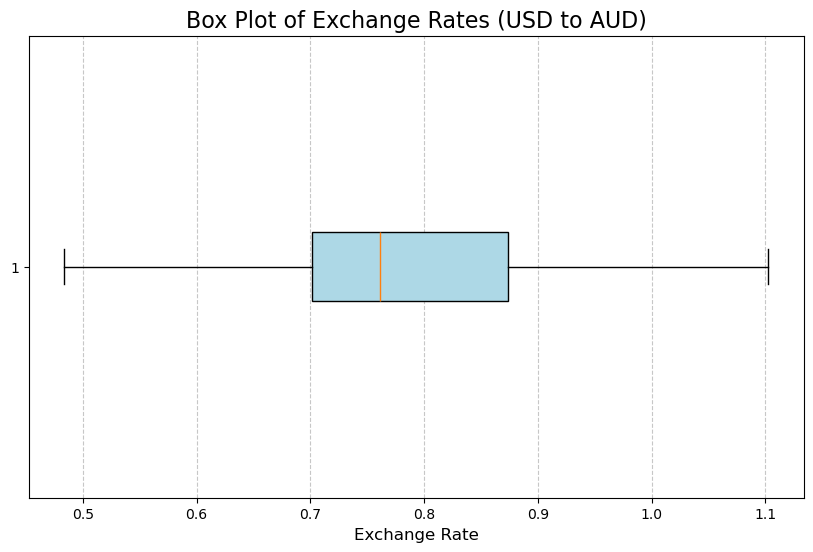

In [202]:
# Box plot to visualize potential outliers

plt.figure(figsize=(10, 6))
plt.boxplot(df['Ex_rate'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Exchange Rates (USD to AUD)', fontsize=16)
plt.xlabel('Exchange Rate', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
Decompose the time series to understand trends, seasonality, and residuals, which will help in model preparation. ​

In [60]:
#Perform seasonal decomposition

decomposition = seasonal_decompose(df['Ex_rate'], model='additive', period=365)
decomposition

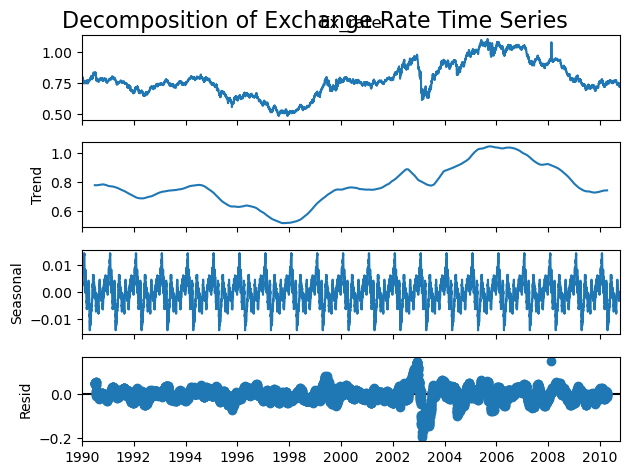

In [62]:
# plot the decomposed components
decomposition.plot()
plt.suptitle('Decomposition of Exchange Rate Time Series', fontsize=16)
plt.show()


# Part 2 : Model Building - ARIMA

In [ ]:
# ACF and PACF Plots for ARIMA parameter selection

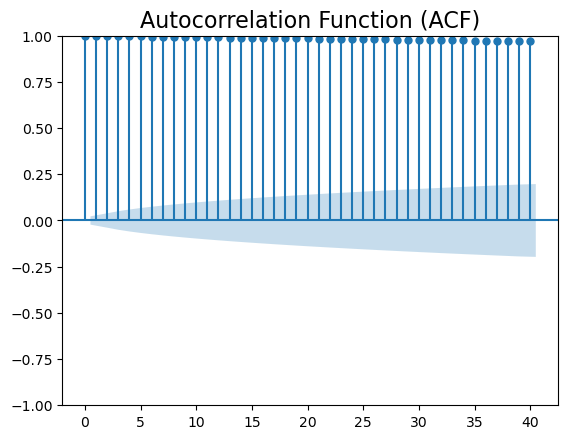

In [67]:
plot_acf(df['Ex_rate'], lags=40)
plt.title('Autocorrelation Function (ACF)', fontsize=16)
plt.show()

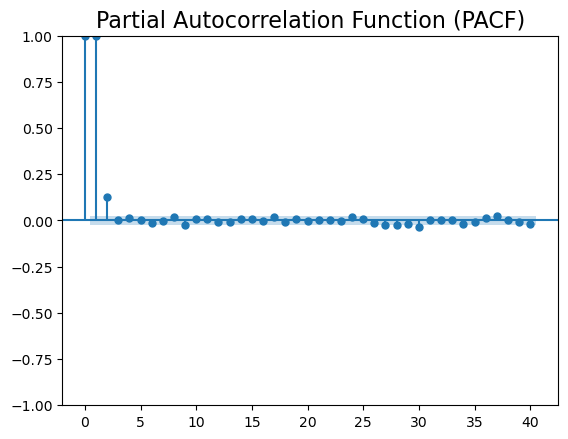

In [69]:
plot_pacf(df['Ex_rate'], lags=40, method='ywm')
plt.title('Partial Autocorrelation Function (PACF)', fontsize=16)
plt.show()

## Fit the ARIMA Model

In [79]:

p, d, q = 2, 1, 2  # example: p=2, d=1, q=2 based on ACF/PACF analysis.
arima_model = ARIMA(df['Ex_rate'], order=(p, d, q))

In [81]:
arima_results=arima_model.fit()

In [83]:
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 1, 2)   Log Likelihood               28055.068
Date:                Sun, 17 Nov 2024   AIC                         -56100.135
Time:                        16:50:53   BIC                         -56065.464
Sample:                    01-01-1990   HQIC                        -56088.236
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1151      0.585     -0.197      0.844      -1.261       1.031
ar.L2          0.1132      0.088      1.293      0.196      -0.058       0.285
ma.L1         -0.0163      0.584     -0.028      0.978      -1.162       1.129
ma.L2         -0.1135      0.052     -2.172      0.030      -0.216      -0.011
sigma2      3.594e-05   1.01e-07    355.944      0.000    3.57e-05    3.61e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2863303.88
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Diagnostics of ARIMA model

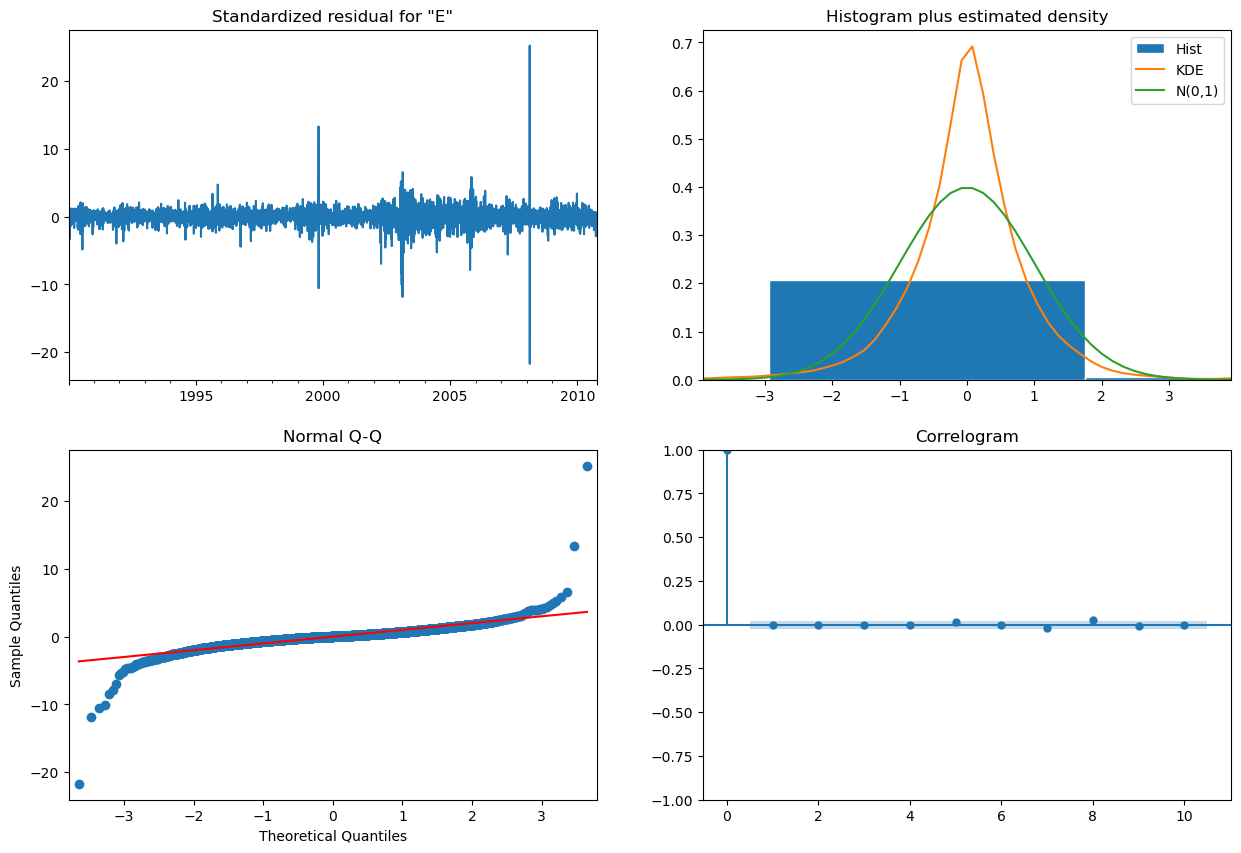

In [85]:

arima_results.plot_diagnostics(figsize=(15, 10))
plt.show()

 ## Forecasting with ARIMA model.

In [87]:
forecast_steps = 30  # Forecast the next 30 days
forecast = arima_results.forecast(steps=forecast_steps)

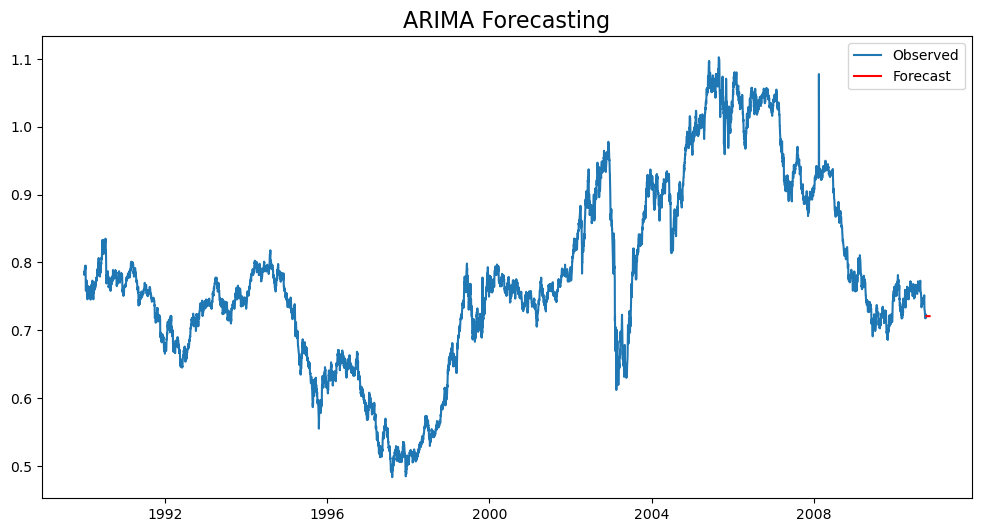

In [89]:
# plot the forcast

plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecasting', fontsize=16)
plt.legend()
plt.show()

# Part 3 : Model Building : Exponential Smoothing

In [ ]:
# MODEL SELECTION

In [ ]:
# Exponential Smoothing: Holt-Winters Model

In [101]:
hw_model = ExponentialSmoothing(df['Ex_rate'], seasonal='add', seasonal_periods=365)

In [103]:
# fit the model
hw_results = hw_model.fit()

In [107]:
# print optimized parameters
print(hw_results.params)

{'smoothing_level': 0.8731360811443003, 'smoothing_trend': nan, 'smoothing_seasonal': 0.0008041705576328763, 'damping_trend': nan, 'initial_level': 0.7817512087908087, 'initial_trend': nan, 'initial_seasons': array([ 3.34774960e-03,  4.48785167e-03,  2.12801727e-03,  3.69506606e-03,
        4.31520723e-03,  4.55996442e-03,  3.98841007e-03,  5.19014545e-03,
        4.65297075e-03,  6.33059656e-03,  7.21388738e-03,  8.33820789e-03,
        9.28233060e-03,  1.06832272e-02,  9.32498716e-03,  9.34083950e-03,
        8.84526081e-03,  7.08820890e-03,  8.81212233e-03,  8.78013953e-03,
        9.44202616e-03,  1.00060677e-02,  9.05205625e-03,  8.68427031e-03,
        7.25851995e-03,  7.41940635e-03,  9.55674170e-03,  1.10038279e-02,
        9.74379949e-03,  1.13663591e-02,  1.23620590e-02,  1.34070033e-02,
        1.30667080e-02,  1.29534782e-02,  1.35152882e-02,  1.34252540e-02,
        1.15366954e-02,  9.25821106e-03,  8.48015045e-03,  6.06512000e-03,
        6.92369319e-03,  3.64704181e-03, 

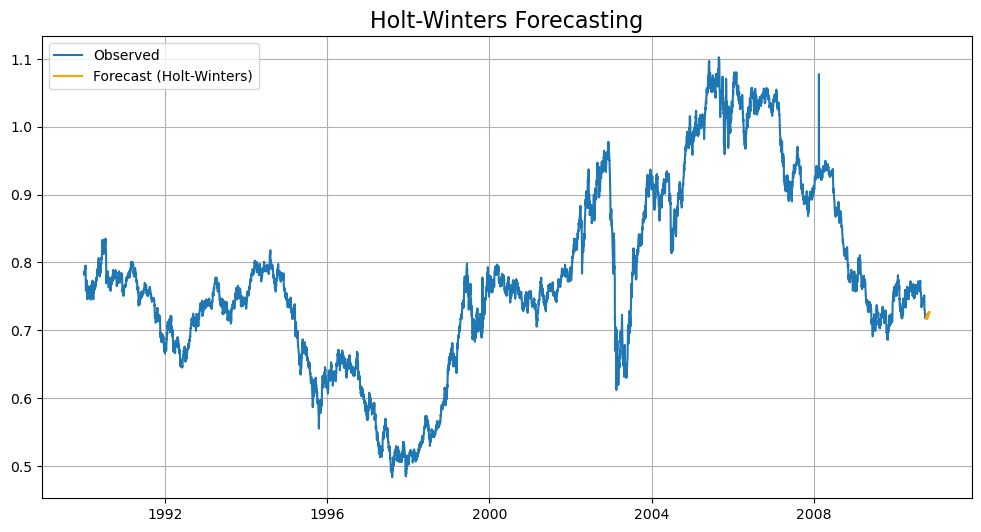

In [204]:
# Forecasting with Holt-Winters
forecast_steps=30
hw_forecast = hw_results.forecast(forecast_steps) # forcast for next 30 days

plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Observed')
plt.plot(hw_forecast, label='Forecast (Holt-Winters)', color='orange')
plt.title('Holt-Winters Forecasting', fontsize=16)
plt.legend()
plt.grid()
plt.show()

## Grid Search and AIC to find Optimal Parameters

In [121]:

# Define parameter ranges for alpha, beta, gamma
alpha_range = np.linspace(0.1, 1.0, 10)  # Example: [0.1, 0.2, ..., 1.0]
beta_range = np.linspace(0.1, 1.0, 10)
gamma_range = np.linspace(0.1, 1.0, 10)


In [125]:
from itertools import product   # imported product

In [156]:
 # Define parameter ranges for alpha, beta, gamma
alpha_range = np.linspace(0.1, 1.0, 5)  # Fewer steps for quicker computation
beta_range = np.linspace(0.1, 1.0, 5)
gamma_range = np.linspace(0.1, 1.0, 5)

# Initialize variables to store the best parameters and corresponding AIC
best_aic = float('inf')
best_params = None
best_model = None


# Perform grid search
for alpha, beta, gamma in product(alpha_range, beta_range, gamma_range):
    try:
        # Fit the model with current parameters
        model = ExponentialSmoothing(
            df['Ex_rate'],
            trend='add',  # Additive trend
            seasonal='add',  # Additive seasonality
            seasonal_periods=365
        ).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
        
        # Evaluate AIC
        aic = model.aic
        if aic < best_aic:
            best_aic = aic
            best_params = (alpha, beta, gamma)
            best_model = model
    except Exception as e:
        continue  


# Print the best parameters and AIC
print(f"Best Parameters (alpha, beta, gamma): {best_params}")
print(f"Best AIC: {best_aic}")

Best Parameters (alpha, beta, gamma): (0.775, 0.1, 0.1)
Best AIC: -76283.90050597786


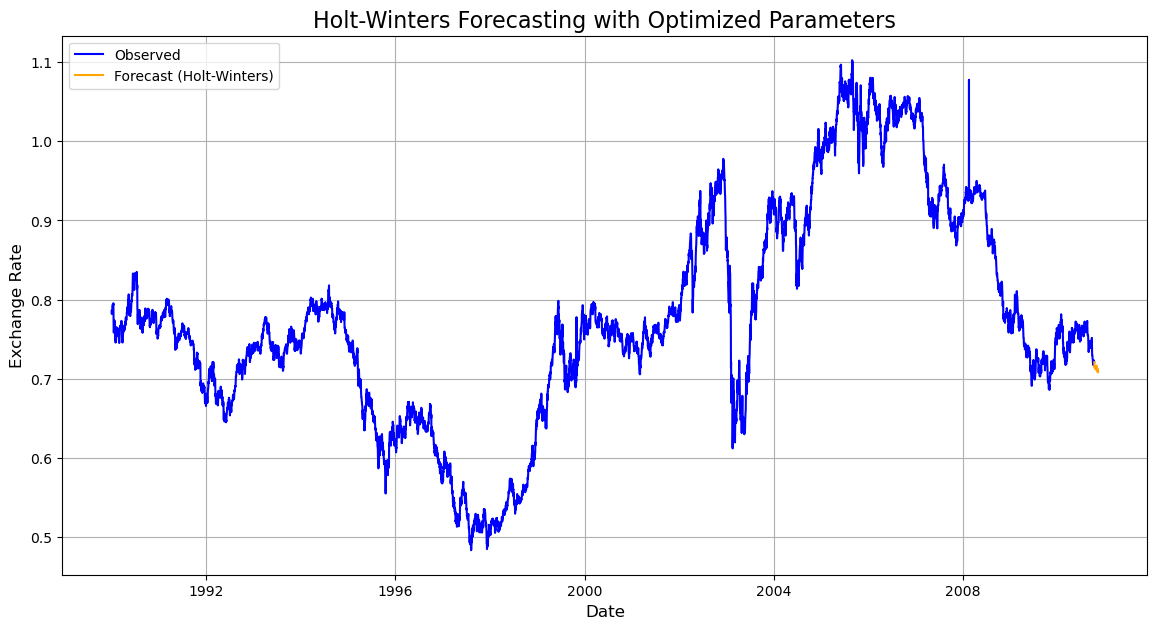

In [163]:
# Forecast using the best model
forecast_steps = 30
forecast = best_model.forecast(steps=forecast_steps)

# Plot observed and forecasted values
plt.figure(figsize=(14, 7))
plt.plot(df['Ex_rate'], label='Observed', color='blue')
plt.plot(forecast, label='Forecast (Holt-Winters)', color='orange')
plt.title('Holt-Winters Forecasting with Optimized Parameters', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Exchange Rate', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Evaluation & Comaparison

In [165]:
# Compute Error Metrics
def compute_error_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

In [186]:
#  error metrics for ARIMA (on training data )
mae_arima, rmse_arima, mape_arima = compute_error_metrics(df['Ex_rate'][-30:], forecast[:30])


In [175]:
print(f"ARIMA Model Errors:\n MAE: {mae_arima:.4f}, RMSE: {rmse_arima:.4f}, MAPE: {mape_arima:.2f}%")


ARIMA Model Errors:
 MAE: 0.0196, RMSE: 0.0225, MAPE: nan%


In [171]:
#  error metrics for Holt-Winters (on training data )
mae_hw, rmse_hw, mape_hw = compute_error_metrics(df['Ex_rate'][-30:], hw_forecast[:30])# Replace with actual test data if available

In [177]:
print(f"Holt-Winters Model Errors:\n MAE: {mae_hw:.4f}, RMSE: {rmse_hw:.4f}, MAPE: {mape_hw:.2f}%")


Holt-Winters Model Errors:
 MAE: 0.0153, RMSE: 0.0191, MAPE: nan%


##  Model Comparison

## Conclusion

# --- The End ----